In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

# Topics in Cloud and Environment (2019)

## Week 06: Evaluating Statistical Models
---

So far we have introduced a few statistical (machine learning) models and some performance metrics. From working on the preactical projects, you must have discovered that there are so many aspects of a statistical model that it's hard to compare between different models, as well as the choice of hyper-parameters among a family of model.

In this module, we are going to discuss a few aspects of how to evaluate statistical models. We will start from some commonly used performance metrics, estimating the performance on future data, and some meta framework for model evaluation.

# Outline
---

- What do Statistical Models Do
- Performance metrics
- Errors, in and out of sample 
- Bias-Variance Tradeoff
- Overfitting and model selection
- Cross-validation



# What do Statistical Models Do?

There are (at least) three levels at which we can use statistical models in data analysis: 

- as *summaries of the data*, 
- as *predictors*, and 
- as *simulators*. 

# Data Summarization

Like most descriptive statistics, a statistical model can summarize the data with a set of *parameters*. This can be the lowest and least demanding level usage of a statistical model, which is for **data reduction**, or **compression**. Instead of remembering all the data points on a scatter-plot, say, we’d just remember what the mean and variance of them.

The summary can be in the form of a theoretical distribution (*parametric*) or empirical functions(*non-parametric*).

In [2]:
# Generate dataset
data = np.random.normal(100, 15, 500)
# Calculate statistics
mu = data.mean()
sigma = data.std()
# Calculate PDF from data
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 50)
h = np.histogram(data, bins=x)
# Plot
#print(mu)
#print(sigma)

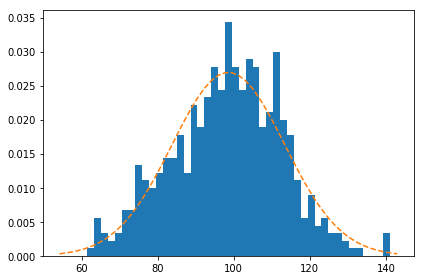

In [3]:
fig, ax = plt.subplots()
n, hx, patches = ax.hist(data, bins=x, density=1)
# Calculate PDF from Gaussian distribution
import scipy.stats as stats
y = stats.norm.pdf(hx, mu, sigma)
ax.plot(hx, y, '--')
plt.tight_layout()
plt.show()

# Prediction

The most well-known usage of machine learning models is **using statistical models for prediction**. Once we formed the knowledge of the joint distribution of our data, we can predict variables described by the model.

Most **evaluation** techniques are designed based on the performance of predictions. 



# Simulation

Once the parameters of the statistical models are learned from the data, we can use the model to *generate / simulate* new data. If we train our model with the *Bayesian* approach, then *simulation* is inluded in the learning process. Due to the success of deep convolutional neural network, the generative statistical models are now widely applied to generate digital contents, such as [GPT-2](https://openai.com/blog/better-language-models/), [MuseNet](https://openai.com/blog/musenet/), and [Deepfake](https://en.wikipedia.org/wiki/Deepfake).

<img src="https://cdn.vox-cdn.com/thumbor/nKhCSXmFymvUPS8Rf1NuMcSFAZQ=/800x0/filters:no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/16226452/dali.gif" height="200"/>

# Common Performance Metrics for Classification

- Confusion matrix
  - Accuracy
  - Precision
  - Recall
  - Specificity
  - F1 score
- Precision-Recall or PR curve
- ROC (Receiver Operating Characteristics) curve
- PR vs ROC curve.


# Confusion Matrix

In statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one.

<img src='figures/confusion_matrix.png' />

Many metrics can be derived from this confusion metrics, and [the wikipedia entry](https://en.wikipedia.org/wiki/Confusion_matrix) has a complete list of them.

# Accuracy, Precision, Recall, and F-1

- **Accuracy**: the probability of being correct. 
  - $\frac{TP+TN}{TP+FP+TN+FN}$

- **Precision**: the probability of being correct when predicting true. 
  - $\frac{TP+}{TP+FP}$
  - PPV (Positive Predictive Value)

- **Recall**: the probability of being correct when actually true. 
  - $\frac{TP+}{TP+FN}$
  - Sensitivity, TPR (True Positive Rate)

- **F-1 socre**: the harmonic mean of **precision** and **recall**, a balanced measure.
  - $\frac{2}{\frac{1}{precision} + \frac{1}{recall}} = \frac{2*precision*recall}{precision+recall}$


# PR (Precision-Recall) Curve

<img src='figures/pr_curve.png' />

# ROC  (Receiver Operating Characteristics) Curve

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

<img src='figures/roc_curve.png' />

# Metrics for Regression problems

- **RMSE** (Root Mean Squared Error)
  - $\sqrt{\frac{1}{n} \sum{(y_i - \hat y_i)^2}}$



- **MAE** (Mean Absolute Error)
  - $\frac{1}{n} \sum{|y_i - \hat y_i|}$



- $R^2$, Coefficient of determination, Explained Variance
  - $1 - SS_{res} / SS_{tot}= 1 - \sum{(y_i - \hat y_i)^2} / \sum{(y_i - \bar y)^2}$



# Deriving Performance Metrics in Practice

The package [`scikit-learn`](https://scikit-learn.org/stable/modules/model_evaluation.html) provides a thourough list of performance metrics, so that it's rather easy to use in practice. Let's see some examples.

In [4]:
# Create data
y_true = np.random.randint(0,2,size=1000)
y_pred = np.copy(y_true)
# Sample 10% of data to flip
idx_flip = np.random.choice(range(len(y_true)), size=100)
y_pred[idx_flip] = np.abs(y_true[idx_flip]-1)
y2 = np.copy(y_pred)
idx_flip1 = np.random.choice(range(len(y_true)), size=200)
y2[idx_flip1] = np.abs(y_pred[idx_flip1]-1)
y3 = np.copy(y2)
idx_flip2 = np.random.choice(range(len(y_true)), size=300)
y3[idx_flip2] = np.abs(y2[idx_flip2]-1)
#print(idx_flip)
#print(y_true)
#print(y_pred)
# Create confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[472,  50],
       [ 45, 433]])

In [5]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[472  50]
 [ 45 433]]


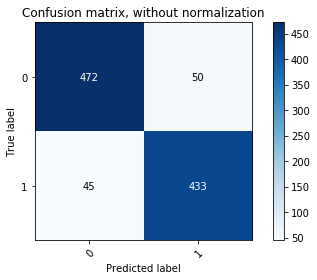

 Accuracy: 0.905
 Precision: 0.8964803312629399
 Recall: 0.9058577405857741
 F1 score: 0.9011446409989594


In [6]:
plot_confusion_matrix(y_true, y_pred)
plt.show()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(' Accuracy: '+ str(accuracy_score(y_true, y_pred)))
print(' Precision: ' + str(precision_score(y_true, y_pred)))
print(' Recall: ' + str(recall_score(y_true, y_pred)))
print(' F1 score: ' + str(f1_score(y_true, y_pred)))

[0.         0.09578544 1.        ]
[0.         0.90585774 1.        ]
[2 1 0]
0.9050361499863737


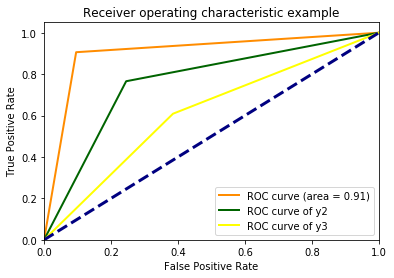

In [7]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
print(fpr)
print(tpr)
print(thresholds)
fpr2, tpr2, thresholds2 = roc_curve(y_true, y2)
fpr3, tpr3, thresholds3 = roc_curve(y_true, y3)
# Compute ROC curve and ROC area for each class
roc_auc = auc(fpr, tpr)
print(roc_auc)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, color='darkgreen', lw=2, label='ROC curve of y2')
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='ROC curve of y3')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Errors, in and out of sample

No matter what metric we use to evaluate the performance of a model prediction, the concept behind the evaluation is the same:

$Y = \hat{Y} + \epsilon = f(X) + \epsilon$

, where $f(X)$ represent the prediction and $e$ is the error term. This is the theoretical form assuming that we have all possible data, $(X,Y)$. However, we nenver really know how much the data we have, $(x,y)$, can represent the complete space of data, $(X,Y)$. Mathematically speaking, what we actually have is:

$Y = \hat{Y} + e = \hat{f}(x) + e$

While all the evaluation metrics we discussed above are based on the **in-sample** error, $e$, what we really want to know is the **true-error**, $\epsilon$.

# The Bias-Variance Tradeoff

Assume that we sample $(x, y)$ from $(X,Y)$ many times, the expectation of $\hat{f}(x)$ will be $f(x)$, and the expectation of $e$ should be $\epsilon$. By combining the formulas in the previous slide, we will have:

$E[e^2] = E[(Y - \hat{f}(x))^2] = E[(f(x) + \epsilon - \hat{f}(x))^2] = \dots = Bias[\hat{f}(x)]^2 + Var[\hat{f}(x)] + \sigma_{\epsilon}^2 $

In plain text, the sum of squared errors is the sum of $bias$, $variance$ and the $irreducible error$.

And in plain English, when your model is more accurate at the prediction results, the spread of your errors on different sample will be larger. 

- Reference: [Derivation of bias-variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff#Derivation)

# Overfitting and Underfitting

The following figure clearly demonstrates the implication of bias-variance tradeoff:

- **Overfitting**: if we use a more complicated model to get a lower in-smaple error, the generalizability of the model will be limited: it might give very high errors in other samples.

- **Underfitting**: if we use a simple model structure, we may have high errors in the training data, but the errors for other samples might be within a similar magnitude.

- Reference: [Understanding the Bias-Variance Tradeoff](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)

<img src='figures/bias_var_tradeoff.png' />

# Model Selection

The bias-variance-tradeoff shows us that mathematically we cannot find a model having both high accuracy and good generalizability at the same time. Hence, a good model should be balancing between the bias and the variance. There are many [model selection techniques](https://en.wikipedia.org/wiki/Model_selection), to list some of them:

- [Akaike information criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion)
- [Bayesian information criterion (BIC)](https://en.wikipedia.org/wiki/Bayesian_information_criterion)
- [Stepwise regression](https://en.wikipedia.org/wiki/Stepwise_regression)
- [Lasso regression](https://en.wikipedia.org/wiki/Lasso_(statistics))

Some methods use *variable-selection* approach: compose models with diffierent combinations of independet variables and evaluate their errors and complexities; and some methods add *regularization* terms into the model to penalize overfitting. Later we will show an example using [`Lasso regression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with `scikit-learn`.



# Cross Validation

Let's recall the difference between the *in-sample* and the *generalized* errors. While the *training* process focus on minimizing the *in-sample* error, our ultimate goal is to minimize the *generalized* error, or the *true* error. 

How do we do that? The simplest way is to split the data into two parts: *training set* and *test set*. We train the model with the *training set*, and then evaluate its performance with the *test set*. The results from evaluating with one data split can be unstable, so we can repeat this process several times, and eventually we can approximate the *true error* from the final results.


[**Cross validation**](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) is a systematic way to estimate the *true error* with the data we have. We split the whole dataset (of size *N*) into *k* parts, and each part is used as the *test set* while the rest *k-1* parts are used as the *training set*. After repeating *k* times, we report the averaged errors as the approximation of *true error*.

<img src='figures/k-fold_cross_validation.jpg' />

The figure above shows a 4-fold cross validation. A cross-validation of *k = N* is called **leave-one-out**. It's mathematically proved that the *out-of-sample error* of CV for *k > 10* is a reliable approximation of *true error*.


# Beyond Training and Testing Split

All the discussion above focuses on *finding the best parameters and hyper-parameters for a model* so that the final model can well balance between the bias and variance.

What if we have multiple family of models to chose from?

In practice, we will split dataset into three partitions:

- training set
- development set
- test set

The *training set* and *development set* is the same as the *training set* and *test set* in earlier context, and the *test set* here is used to evaluate all fine-tuned models in the end. 



Finally, let's see some concrete examples.